In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset_Treino.csv')
df

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
0,1,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,15/09/2022,0.0,123,1
1,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123,0
2,3,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,15/09/2022,1.0,123,0
3,4,18,public,Ensino Médio concluído e não estudando,SP,Osasco,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123,0
4,5,19,public,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,Não,Não,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,5351,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,4,Até 1 salário mínimo (até R$1.100),Site de notícias,Noite,18/12/2022,0.0,29,1
3734,5353,19,public,Cursando o 3º ano do Ensino Médio,RJ,Queimados,Não,Não,Ainda não concluí um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Instagram,Já concluí,18/12/2022,0.0,29,0
3735,5354,18,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Não,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,18/12/2022,0.0,29,1
3736,5355,18,public,Ensino Médio concluído e não estudando,SP,São Paulo,Não,Não,Nunca realizei um curso a distância,Não sei dizer,...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,18/12/2022,0.0,29,0


In [3]:
df.dtypes

ID_Aluno                     int64
Idade                        int64
Tipo_escola                 object
Escolaridade                object
Estado                      object
Municipio                   object
Trabalhando                 object
Estudando                   object
Concluiu_EAD                object
Aprender_EAD                object
Recursos                    object
Disponibilidade_Tutoria     object
Disponibilidade_3_Meses     object
Pessoas_Casa                object
Renda_Familiar              object
Conheceu_PROA               object
Horario_Estudando           object
Data_Inscrição              object
Dias_Espera_Aprovacao      float64
Dias_Espera_Inicio           int64
Abandono_curso               int64
dtype: object

In [4]:
df['Dias_Espera_Aprovacao']=df['Dias_Espera_Aprovacao'].astype(int)
df['Dias_Espera_Inicio']=df['Dias_Espera_Inicio'].astype(int)
df['Dias_Espera_Inicio']=df['Dias_Espera_Inicio'].astype(int)

In [5]:
df.dtypes

ID_Aluno                    int64
Idade                       int64
Tipo_escola                object
Escolaridade               object
Estado                     object
Municipio                  object
Trabalhando                object
Estudando                  object
Concluiu_EAD               object
Aprender_EAD               object
Recursos                   object
Disponibilidade_Tutoria    object
Disponibilidade_3_Meses    object
Pessoas_Casa               object
Renda_Familiar             object
Conheceu_PROA              object
Horario_Estudando          object
Data_Inscrição             object
Dias_Espera_Aprovacao       int32
Dias_Espera_Inicio          int32
Abandono_curso              int64
dtype: object

In [6]:
var_cat_ord = ['Escolaridade','Renda_Familiar','Pessoas_Casa']
var_cat_nom = ['Tipo_escola','Estado','Municipio','Trabalhando','Estudando','Concluiu_EAD','Aprender_EAD','Recursos','Disponibilidade_Tutoria','Disponibilidade_3_Meses','Conheceu_PROA','Horario_Estudando','Data_Inscrição']
var_num = ['Idade','Dias_Espera_Aprovacao','Dias_Espera_Inicio']
var_target = ['Abandono_curso']

In [7]:
var_cat = var_cat_ord+var_cat_nom

In [8]:
df[var_num].describe()

,Idade,Dias_Espera_Aprovacao,Dias_Espera_Inicio
count,3738.000000,3738.000000,3738.000000
mean,18.858480,2.538523,77.585875
std,1.572453,9.566954,28.934097
min,16.000000,0.000000,29.000000
25%,18.000000,0.000000,51.000000
50%,18.000000,0.000000,82.000000
75%,20.000000,0.000000,106.000000
max,24.000000,86.000000,123.000000


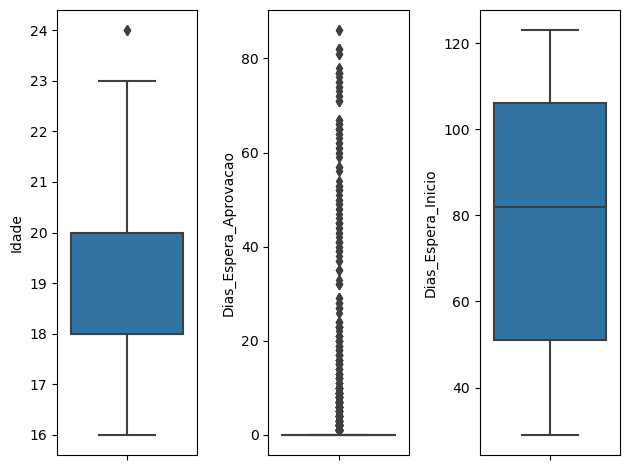

In [9]:
for i,coluna in enumerate(var_num):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df[var_num],y=coluna)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Dias_Espera_Aprovacao', ylabel='Count'>

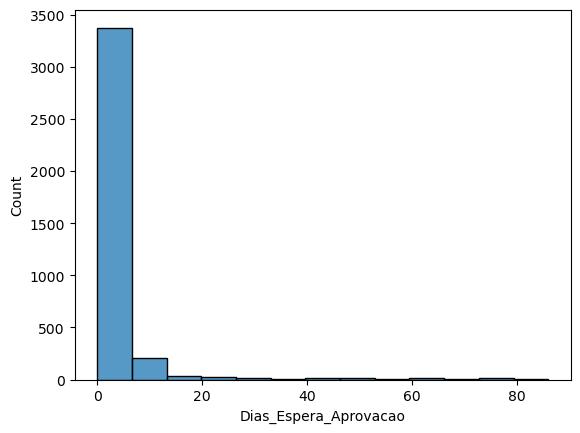

In [10]:
sns.histplot(data=df[var_num],x='Dias_Espera_Aprovacao')

In [11]:
df.isna().sum()

ID_Aluno                    0
Idade                       0
Tipo_escola                 0
Escolaridade                0
Estado                      0
Municipio                  11
Trabalhando                 0
Estudando                   5
Concluiu_EAD                2
Aprender_EAD                0
Recursos                    4
Disponibilidade_Tutoria     0
Disponibilidade_3_Meses     0
Pessoas_Casa                0
Renda_Familiar              0
Conheceu_PROA               0
Horario_Estudando           0
Data_Inscrição              0
Dias_Espera_Aprovacao       0
Dias_Espera_Inicio          0
Abandono_curso              0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df = df.drop_duplicates()

In [14]:
df[var_cat].describe()

,Escolaridade,Renda_Familiar,Pessoas_Casa,Tipo_escola,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Conheceu_PROA,Horario_Estudando,Data_Inscrição
count,3716,3716,3716,3716,3716,3716,3716,3716,3716,3716,3716,3716,3716,3716,3716,3716
unique,5,6,11,2,4,352,2,2,5,4,54,2,2,21,5,94
top,Cursando o 3º ano do Ensino Médio,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),4,public,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Internet wifi,Sim,Sim,Instagram,Já concluí,26/09/2022
freq,3454,1462,1122,3611,1872,973,3431,2160,1601,2330,860,3690,3711,1050,1884,250


#Escolaridade, renda familiar e pessoas_casa vão categóricas ordinais. Irão entrar em um label encoding
#Tipo_Escola,Trabalhando,Estudando, Disponibilidade_Tutoria,Disponibilidade_3_Meses receberão 0 ou 1
#Analisar as categóricas: Estado, Municipio, Concluiu_EAD, Aprender_EAD,Recursos,Conheceu_PROA, Horario_Estudando, Data_Inscrição

In [15]:
df['Data_Inscrição']=pd.to_datetime(df['Data_Inscrição'])
df['Mes_Inscrição']=df['Data_Inscrição'].dt.month
df = df.drop(columns=['Data_Inscrição'])
df['Mes_Inscrição']=df['Mes_Inscrição'].astype(str)


In [16]:
var_analise = ['Estado','Municipio','Concluiu_EAD','Aprender_EAD','Recursos','Conheceu_PROA','Horario_Estudando']
df[var_analise].describe()


,Estado,Municipio,Concluiu_EAD,Aprender_EAD,Recursos,Conheceu_PROA,Horario_Estudando
count,3716,3716,3716,3716,3716,3716,3716
unique,4,352,5,4,54,21,5
top,SP,São Paulo,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Internet wifi,Instagram,Já concluí
freq,1872,973,1601,2330,860,1050,1884


In [17]:
df_fin1 = df

In [18]:
def df_apoio(nom_col):
    df_A = df_fin1.groupby([nom_col,'Abandono_curso']).agg({'ID_Aluno':'nunique'}).reset_index()
    df_B = df_fin1.groupby([nom_col]).agg({'ID_Aluno':'nunique'}).reset_index()
    df_C = df_A.merge(df_B,on=nom_col)
    df_C['Porcentagem'] = (df_C['ID_Aluno_x']/df_C['ID_Aluno_y'])*100
    sns.barplot(data=df_C,x=nom_col,y='Porcentagem',hue='Abandono_curso')
    plt.xticks(rotation=83)
    plt.show()

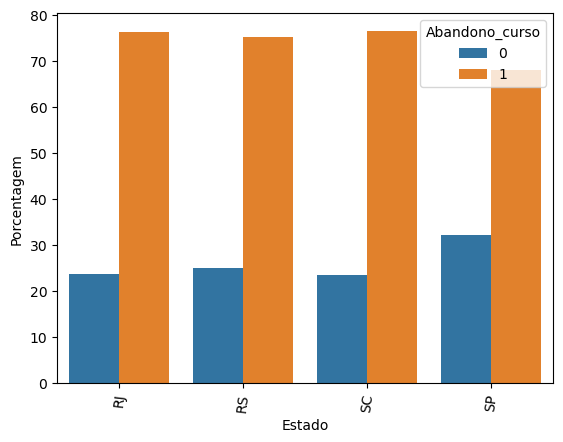

In [19]:
df_apoio('Estado')

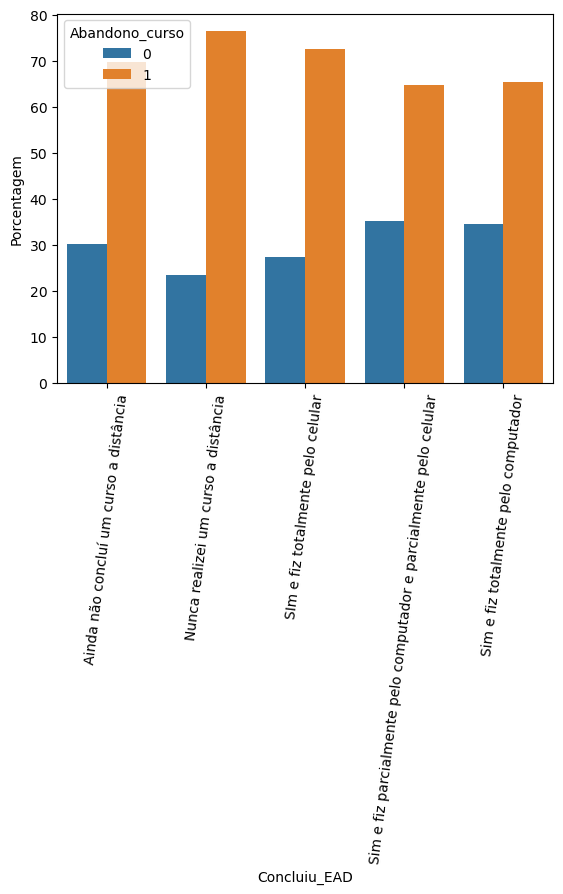

In [20]:
df_apoio('Concluiu_EAD')

In [20]:
df_fin1['Recursos'].value_counts()

Computador/Celular próprio/Internet wifi                                                                                             860
Computador/Celular próprio/Internet wifi/Internet 4G                                                                                 799
Celular próprio/Internet wifi                                                                                                        767
Celular próprio/Internet wifi/Internet 4G                                                                                            403
Celular próprio                                                                                                                      306
Computador/Celular próprio                                                                                                            96
Celular próprio/Internet 4G                                                                                                           77
Computador                               

In [21]:
df_fin1['Mes_Inscrição'].value_counts()

9     984
10    788
11    701
12    448
8     146
1     112
7     101
3      99
4      95
6      93
5      86
2      63
Name: Mes_Inscrição, dtype: int64

In [22]:
df_fin2 = df_fin1.drop(columns=['Estado','Municipio','Aprender_EAD'])

In [23]:
df_fin2
df_fin2['Tipo_escola']=df_fin2['Tipo_escola'].replace({'public':1,'scholarship':0})
df_fin2['Trabalhando']=df_fin2['Trabalhando'].replace({'Sim':1,'Não':0})
df_fin2['Estudando']=df_fin2['Estudando'].replace({'Sim':1,'Não':0})
df_fin2['Disponibilidade_Tutoria']=df_fin2['Disponibilidade_Tutoria'].replace({'Sim':1,'Não':0})
df_fin2['Disponibilidade_3_Meses']=df_fin2['Disponibilidade_3_Meses'].replace({'Sim':1,'Não':0})

In [24]:
df_fin3 = df_fin2
df_fin3

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Concluiu_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Mes_Inscrição
0,1,19,1,Cursando o 3º ano do Ensino Médio,0,1,SIm e fiz totalmente pelo celular,Computador/Celular próprio/Tablet próprio/Inte...,1,1,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,0,123,1,9
1,2,21,1,Cursando o 3º ano do Ensino Médio,0,0,Ainda não concluí um curso a distância,Computador,1,1,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,1,123,0,9
2,3,17,1,Cursando o 3º ano do Ensino Médio,0,1,Nunca realizei um curso a distância,Celular próprio/Internet wifi,1,1,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,1,123,0,9
3,4,18,1,Ensino Médio concluído e não estudando,0,1,Sim e fiz parcialmente pelo computador e parci...,Computador/Celular próprio/Tablet próprio/Inte...,1,1,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,3,123,0,9
4,5,19,1,Ensino Médio concluído e não estudando,0,0,Sim e fiz parcialmente pelo computador e parci...,Computador/Celular próprio/Tablet próprio/Inte...,1,1,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,0,123,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,5351,17,1,Cursando o 3º ano do Ensino Médio,0,1,SIm e fiz totalmente pelo celular,Celular próprio,1,1,4,Até 1 salário mínimo (até R$1.100),Site de notícias,Noite,0,29,1,12
3734,5353,19,1,Cursando o 3º ano do Ensino Médio,0,0,Ainda não concluí um curso a distância,Celular próprio/Internet wifi,1,1,3,Até 1 salário mínimo (até R$1.100),Instagram,Já concluí,0,29,0,12
3735,5354,18,1,Cursando o 3º ano do Ensino Médio,0,0,Nunca realizei um curso a distância,Celular próprio/Tablet próprio/Internet wifi/I...,1,1,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,0,29,1,12
3736,5355,18,1,Ensino Médio concluído e não estudando,0,0,Nunca realizei um curso a distância,Celular próprio/Internet wifi,1,1,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,0,29,0,12


In [25]:
def label_encoding(coluna):
    array = df_fin3[coluna].sort_values().unique()
    dic = {}
    i=0
    for classe in array:
        dic[classe]=i
        i+=1
    df_fin3[coluna]=df_fin3[coluna].replace(dic)

In [26]:
label_encoding('Escolaridade')
label_encoding('Renda_Familiar')
label_encoding('Mes_Inscrição')
label_encoding('Pessoas_Casa')

In [27]:
df_fin4 = df_fin3
df_fin4.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Concluiu_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Mes_Inscrição
0,1,19,1,0,0,1,SIm e fiz totalmente pelo celular,Computador/Celular próprio/Tablet próprio/Inte...,1,1,7,2,LinkedIn,Noite,0,123,1,11
1,2,21,1,0,0,0,Ainda não concluí um curso a distância,Computador,1,1,3,1,Junior Achievement,Manhã,1,123,0,11
2,3,17,1,0,0,1,Nunca realizei um curso a distância,Celular próprio/Internet wifi,1,1,3,0,Indicação de familiar,Manhã,1,123,0,11
3,4,18,1,3,0,1,Sim e fiz parcialmente pelo computador e parci...,Computador/Celular próprio/Tablet próprio/Inte...,1,1,5,1,Instagram,Noite,3,123,0,11
4,5,19,1,3,0,0,Sim e fiz parcialmente pelo computador e parci...,Computador/Celular próprio/Tablet próprio/Inte...,1,1,3,1,Divulgação do iFood,Já concluí,0,123,0,11


In [28]:
col_dummies = ['Concluiu_EAD','Horario_Estudando']
for col in col_dummies:
    onehots = pd.get_dummies(df_fin4[col],prefix=col)
    df_fin4 = df_fin4.join(onehots)
df_fin4 = df_fin4.drop(columns=col_dummies)

In [29]:
pd.set_option('display.max_columns', None)
df_fin4.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Mes_Inscrição,Concluiu_EAD_Ainda não concluí um curso a distância,Concluiu_EAD_Nunca realizei um curso a distância,Concluiu_EAD_SIm e fiz totalmente pelo celular,Concluiu_EAD_Sim e fiz parcialmente pelo computador e parcialmente pelo celular,Concluiu_EAD_Sim e fiz totalmente pelo computador,Horario_Estudando_Integral,Horario_Estudando_Já concluí,Horario_Estudando_Manhã,Horario_Estudando_Noite,Horario_Estudando_Tarde
0,1,19,1,0,0,1,Computador/Celular próprio/Tablet próprio/Inte...,1,1,7,2,LinkedIn,0,123,1,11,0,0,1,0,0,0,0,0,1,0
1,2,21,1,0,0,0,Computador,1,1,3,1,Junior Achievement,1,123,0,11,1,0,0,0,0,0,0,1,0,0
2,3,17,1,0,0,1,Celular próprio/Internet wifi,1,1,3,0,Indicação de familiar,1,123,0,11,0,1,0,0,0,0,0,1,0,0
3,4,18,1,3,0,1,Computador/Celular próprio/Tablet próprio/Inte...,1,1,5,1,Instagram,3,123,0,11,0,0,0,1,0,0,0,0,1,0
4,5,19,1,3,0,0,Computador/Celular próprio/Tablet próprio/Inte...,1,1,3,1,Divulgação do iFood,0,123,0,11,0,0,0,1,0,0,1,0,0,0


In [30]:
df_fin5 = df_fin4.drop(columns='ID_Aluno')

def encod(coluna):
    dic = df_fin5[coluna].value_counts().to_dict()
    df_fin5[coluna]=df_fin5[coluna].replace(dic)
    
encod('Recursos')
encod('Conheceu_PROA')


In [31]:
df_fin6 = df_fin5
df_fin6

,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Mes_Inscrição,Concluiu_EAD_Ainda não concluí um curso a distância,Concluiu_EAD_Nunca realizei um curso a distância,Concluiu_EAD_SIm e fiz totalmente pelo celular,Concluiu_EAD_Sim e fiz parcialmente pelo computador e parcialmente pelo celular,Concluiu_EAD_Sim e fiz totalmente pelo computador,Horario_Estudando_Integral,Horario_Estudando_Já concluí,Horario_Estudando_Manhã,Horario_Estudando_Noite,Horario_Estudando_Tarde
0,19,1,0,0,1,45,1,1,7,2,69,0,123,1,11,0,0,1,0,0,0,0,0,1,0
1,21,1,0,0,0,70,1,1,3,1,23,1,123,0,11,1,0,0,0,0,0,0,1,0,0
2,17,1,0,0,1,767,1,1,3,0,414,1,123,0,11,0,1,0,0,0,0,0,1,0,0
3,18,1,3,0,1,45,1,1,5,1,1050,3,123,0,11,0,0,0,1,0,0,0,0,1,0
4,19,1,3,0,0,45,1,1,3,1,35,0,123,0,11,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,17,1,0,0,1,306,1,1,4,0,99,0,29,1,3,0,0,1,0,0,0,0,0,1,0
3734,19,1,0,0,0,767,1,1,3,0,1050,0,29,0,3,1,0,0,0,0,0,1,0,0,0
3735,18,1,0,0,0,10,1,1,3,1,1050,0,29,1,3,0,1,0,0,0,0,1,0,0,0
3736,18,1,3,0,0,767,1,1,5,1,1050,0,29,0,3,0,1,0,0,0,0,1,0,0,0


In [32]:
df_fin6.dtypes

Idade                                                                              int64
Tipo_escola                                                                        int64
Escolaridade                                                                       int64
Trabalhando                                                                        int64
Estudando                                                                          int64
Recursos                                                                           int64
Disponibilidade_Tutoria                                                            int64
Disponibilidade_3_Meses                                                            int64
Pessoas_Casa                                                                       int64
Renda_Familiar                                                                     int64
Conheceu_PROA                                                                      int64
Dias_Espera_Aprovacao

#### TREINO E TESTE

In [33]:
y = df_fin6.Abandono_curso
x = df_fin6.drop('Abandono_curso',axis=1)

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [169]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.25,stratify=y,random_state=123)

In [170]:
print(x_treino.shape,x_teste.shape,y_treino.shape,y_teste.shape)

(2787, 24) (929, 24) (2787,) (929,)


#### BALANCEAMENTO DE CLASSE

In [171]:
df_fin6['Abandono_curso'].value_counts()

1    2676
0    1040
Name: Abandono_curso, dtype: int64

In [39]:
!pip install -q imblearn
from imblearn.over_sampling import SMOTE

In [172]:
over_sampler = SMOTE(k_neighbors=8)

x_res,y_res = over_sampler.fit_resample(x_treino,y_treino)
x_treino = x_res
y_treino = y_res

In [173]:
y_res.value_counts()

1    2007
0    2007
Name: Abandono_curso, dtype: int64

#### FEATURE SCALLING --

In [174]:
df_fin6.head()

,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Mes_Inscrição,Concluiu_EAD_Ainda não concluí um curso a distância,Concluiu_EAD_Nunca realizei um curso a distância,Concluiu_EAD_SIm e fiz totalmente pelo celular,Concluiu_EAD_Sim e fiz parcialmente pelo computador e parcialmente pelo celular,Concluiu_EAD_Sim e fiz totalmente pelo computador,Horario_Estudando_Integral,Horario_Estudando_Já concluí,Horario_Estudando_Manhã,Horario_Estudando_Noite,Horario_Estudando_Tarde
0,19,1,0,0,1,45,1,1,7,2,69,0,123,1,11,0,0,1,0,0,0,0,0,1,0
1,21,1,0,0,0,70,1,1,3,1,23,1,123,0,11,1,0,0,0,0,0,0,1,0,0
2,17,1,0,0,1,767,1,1,3,0,414,1,123,0,11,0,1,0,0,0,0,0,1,0,0
3,18,1,3,0,1,45,1,1,5,1,1050,3,123,0,11,0,0,0,1,0,0,0,0,1,0
4,19,1,3,0,0,45,1,1,3,1,35,0,123,0,11,0,0,0,1,0,0,1,0,0,0


In [175]:
treino_mean = x_treino.mean()
treino_std = x_treino.std()

In [176]:
x_treino = (x_treino-treino_mean)/treino_std
x_teste = (x_teste-treino_mean)/treino_std

### TREINAMENTO

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

#### RANDOM FOREST

In [177]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [200, 300, 400, 500, 600], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [178]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [179]:
# Treina o modelo
modelo_v2.fit(x_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600]},
                   scoring='roc_auc')

In [180]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=400)

In [181]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(x_teste)

In [182]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(x_teste)[:,1]

In [183]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[ 76, 184],
       [ 55, 614]], dtype=int64)

In [184]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.6050477176037714


In [185]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [186]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.6516586179142234


In [187]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.7427341227125942


In [188]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 400, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(x_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)

In [189]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Escolaridade
Concluiu_EAD_Nunca realizei um curso a distância
Dias_Espera_Inicio
Conheceu_PROA
Recursos
Concluiu_EAD_SIm e fiz totalmente pelo celular
Horario_Estudando_Já concluí
Idade
Mes_Inscrição
Horario_Estudando_Noite
Concluiu_EAD_Ainda não concluí um curso a distância
Pessoas_Casa
Horario_Estudando_Manhã
Concluiu_EAD_Sim e fiz parcialmente pelo computador e parcialmente pelo celular
Estudando
Dias_Espera_Aprovacao
Concluiu_EAD_Sim e fiz totalmente pelo computador
Renda_Familiar
Horario_Estudando_Integral
Horario_Estudando_Tarde
Trabalhando
Tipo_escola
Disponibilidade_Tutoria
Disponibilidade_3_Meses


In [219]:
dados_prever = pd.read_csv('Dataset_Pred.csv')
dados_prever_original = pd.read_csv('Dataset_Resposta.csv')

In [214]:
for coluna in dados_prever.columns:
    arr_coluna=np.array(dados_prever[coluna].values)
    dados_prever[coluna]=(arr_coluna-treino_mean[coluna])/treino_std[coluna]

In [215]:
dados_prever

,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Mes_Inscrição,Concluiu_EAD_Ainda não concluí um curso a distância,Concluiu_EAD_Nunca realizei um curso a distância,Concluiu_EAD_SIm e fiz totalmente pelo celular,Concluiu_EAD_Sim e fiz parcialmente pelo computador e parcialmente pelo celular,Concluiu_EAD_Sim e fiz totalmente pelo computador,Horario_Estudando_Integral,Horario_Estudando_Já concluí,Horario_Estudando_Manhã,Horario_Estudando_Noite,Horario_Estudando_Tarde
0,0.854248,0.19148,-0.339886,-0.251586,-1.066347,-0.793719,0.100314,0.059153,-0.445053,-0.932856,-0.239165,-0.270309,1.566618,1.405578,-0.291279,-0.709795,-0.431015,-0.364561,3.210058,-0.252145,1.120153,-0.48557,-0.302211,-0.203064
1,-1.138170,0.19148,-0.339886,-0.251586,0.937547,-1.675849,0.100314,0.059153,2.469211,0.035963,-1.228757,0.607894,1.566618,1.405578,-0.291279,-0.709795,-0.431015,2.742338,-0.311443,-0.252145,-0.892513,-0.48557,3.308127,-0.203064
2,0.190109,0.19148,-0.339886,-0.251586,0.937547,-0.793719,0.100314,0.059153,-0.445053,1.973601,-0.239165,0.827445,1.566618,1.405578,-0.291279,-0.709795,-0.431015,-0.364561,3.210058,-0.252145,1.120153,-0.48557,-0.302211,-0.203064
3,-1.138170,0.19148,-0.339886,-0.251586,0.937547,-0.905253,0.100314,0.059153,-0.445053,-0.932856,-1.410279,-0.160533,1.566618,1.405578,-0.291279,-0.709795,-0.431015,-0.364561,3.210058,-0.252145,-0.892513,2.05892,-0.302211,-0.203064
4,1.518387,0.19148,3.806927,-0.251586,-1.066347,-1.067484,0.100314,0.059153,-1.173619,1.004782,-1.228757,0.498119,1.566618,1.405578,-0.291279,1.408507,-0.431015,-0.364561,-0.311443,-0.252145,1.120153,-0.48557,-0.302211,-0.203064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,0.190109,0.19148,-0.339886,-0.251586,0.937547,-0.793719,0.100314,0.059153,0.283513,-0.932856,-1.225829,-0.270309,-1.602185,-0.548950,-0.291279,-0.709795,-0.431015,2.742338,-0.311443,-0.252145,-0.892513,2.05892,-0.302211,-0.203064
1590,-0.474031,0.19148,-0.339886,-0.251586,-1.066347,-0.905253,0.100314,0.059153,0.283513,0.035963,-0.968184,-0.270309,-1.602185,-0.548950,-0.291279,-0.709795,-0.431015,2.742338,-0.311443,-0.252145,1.120153,-0.48557,-0.302211,-0.203064
1591,2.182527,0.19148,-0.339886,-0.251586,-1.066347,-0.905253,0.100314,0.059153,0.283513,1.004782,-1.228757,-0.270309,-1.636258,-0.548950,-0.291279,-0.709795,-0.431015,-0.364561,3.210058,-0.252145,1.120153,-0.48557,-0.302211,-0.203064
1592,0.190109,0.19148,-0.339886,-0.251586,0.937547,-0.793719,0.100314,0.059153,0.283513,-0.932856,-1.225829,-0.270309,-1.636258,-0.548950,-0.291279,1.408507,-0.431015,-0.364561,-0.311443,-0.252145,1.120153,-0.48557,-0.302211,-0.203064


In [216]:
previsoes = []

for i in range(0,len(dados_prever)):
    array=np.array(dados_prever.iloc[i].values)
    previsao=modelo_v2.predict(array.reshape(1,-1))
    previsoes.append(previsao)

In [245]:
previsoes = [arr[0] for arr in previsoes]

In [247]:
dados_prever_original['Abandono_curso']=previsoes

In [248]:
dataset_final = dados_prever_original[['ID_Aluno','Abandono_curso']]

In [252]:
dataset_final

,ID_Aluno,Abandono_curso
0,7,1
1,8,0
2,9,1
3,17,1
4,18,0
...,...,...
1589,5338,1
1590,5339,1
1591,5347,1
1592,5348,1


In [251]:
dataset_final.to_csv('Dataset_Final.csv',index=False)